<a href="https://colab.research.google.com/github/tadyoung8/Projects/blob/main/red_and_white_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
red_wine = pd.read_csv('/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas/ch_09/data/winequality-red.csv')
white_wine = pd.read_csv('/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas/ch_09/data/winequality-white.csv', sep=';')

In [ ]:
wine = pd.concat([white_wine.assign(kind='white'), red_wine.assign(kind='red')])
wine.sample(5, random_state=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kind
848,6.4,0.64,0.21,1.8,0.081,14.0,31.0,0.99689,3.59,0.66,9.8,5,red
2529,6.6,0.42,0.13,12.8,0.044,26.0,158.0,0.99772,3.24,0.47,9.0,5,white
131,5.6,0.50,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5,red
244,15.0,0.21,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7,red
1551,6.6,0.19,0.99,1.2,0.122,45.0,129.0,0.99360,3.09,0.31,8.7,6,white


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  kind                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


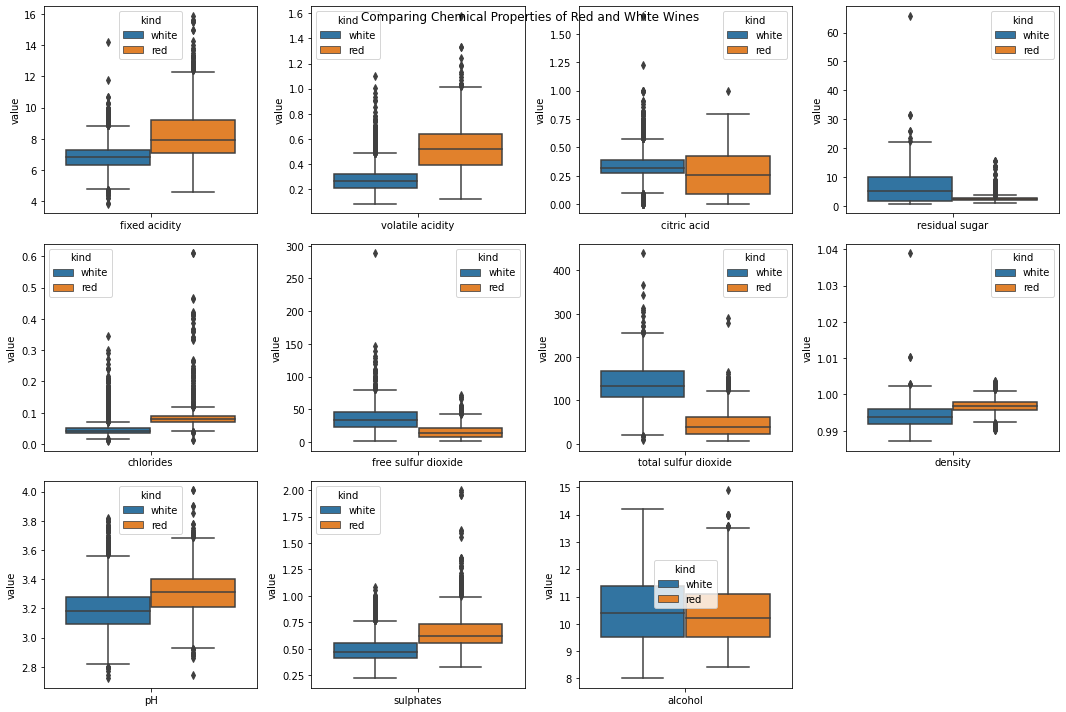

In [ ]:
import math

chemical_properties = [col for col in wine.columns if col not in ['quality', 'kind']]
melted = wine.drop(columns='quality').melt(id_vars=['kind'])

fig, axes = plt.subplots(math.ceil(len(chemical_properties) / 4), 4, figsize=(15, 10))
axes = axes.flatten()

for prop, ax in zip(chemical_properties, axes):
    sns.boxplot(
        data=melted[melted.variable.isin([prop])], 
        x='variable', y='value', hue='kind', ax=ax
    ).set_xlabel('')
    
# remove the extra subplots
for ax in axes[len(chemical_properties):]:
    ax.remove()

plt.suptitle('Comparing Chemical Properties of Red and White Wines')
plt.tight_layout()